In [3]:
import sympy as sp
import sympy.physics.mechanics as me
from pydy.system import System
import numpy as np

f = sp.Symbol('f')
f = 3.  # <----- uncomment this line and get:
# !!! TypeError: <lambda>() takes 3 positional arguments but 4 were given

t = sp.Symbol('t')
x, xv = me.dynamicsymbols('x xv')
xd = me.dynamicsymbols('x', 1)

BaseFrame = me.ReferenceFrame('BaseFrame')
RodFrame = BaseFrame.orientnew('RodFrame', 'Axis', [0, BaseFrame.z])
RodFrame.set_ang_vel(BaseFrame, 0*BaseFrame.z)

origin  = me.Point('origin')
rodcentre  = origin.locatenew('rodcentre', x*BaseFrame.x)
rodcentre.set_vel(BaseFrame, rodcentre.pos_from(origin).diff(t, BaseFrame))

Izz = me.outer(RodFrame.z, RodFrame.z)*10
rodbody = me.RigidBody(name="rod", masscenter=rodcentre, 
                       frame=RodFrame, mass=10, inertia=(Izz, rodcentre))

forces = [ (rodcentre, f*RodFrame.x) ]
bodies = [ rodbody ]

KM = me.KanesMethod(BaseFrame, q_ind=[x], u_ind=[xv], kd_eqs=[ xd - xv ])
fr, frstar = KM.kanes_equations(bodies, forces)

constants = { }
#constants = { f:3 }  # <--- should not work without this uncommented

sys = System(KM,
             constants=constants,
             initial_conditions={x:0., xv:10.},
             times=np.linspace(0.0, 6, 60))
y1 = sys.integrate()
y1.shape

TypeError: <lambda>() takes 3 positional arguments but 4 were given

In [6]:
fr, frstar

(Matrix([[3.0]]), Matrix([[-10*Derivative(xv(t), t)]]))

In [65]:
d = """11,3,4,3
11,3,4,3
401,117,140,123
584,174,204,176
584,174,205,176
585,174,205,176
584,174,204,176
144,44,51,43
11,3,4,3
11,3,4,3
11,3,4,3
11,3,4,3
466,136,163,143
585,174,205,176
585,174,205,176
585,174,205,176
584,174,205,176
79,24,28,23
11,3,4,3
11,3,4,3
11,3,4,3
163,46,57,52
580,172,203,175
584,174,205,176
584,174,205,176
585,174,205,176
579,172,203,174
32,10,11,9
10,3,4,3
10,3,4,3
11,3,4,3
11,3,4,3
11,3,4,3
11,3,4,3
11,3,4,3
11,3,4,3
11,3,4,3
11,3,4,3
11,3,4,3
11,3,4,3
11,3,4,3
32,21,6,5
138,111,14,15
140,112,15,15
140,112,15,15
140,112,15,15
140,112,15,15
140,113,15,15
140,113,15,15
140,113,15,15
140,113,15,15
140,113,15,15
144,113,17,16
147,114,19,16
148,114,19,16
148,114,19,17
155,115,23,18
173,119,33,20
173,119,33,20
173,119,33,20
173,119,33,20
173,119,33,20
187,122,41,23
207,125,52,26
208,126,52,26
208,126,52,26
208,126,52,26
242,133,71,32
249,134,75,33
249,134,75,33
249,134,75,33
260,136,81,35
294,142,99,41
294,142,99,41
294,143,99,41
295,143,100,41
295,142,100,41
329,149,119,47
348,152,129,51
348,152,128,50
348,152,128,50
348,152,129,50
397,161,155,59
413,165,164,62
414,165,164,62
414,165,164,62
414,165,164,62
418,154,175,64
418,154,175,64
418,154,175,64
418,154,175,64
418,154,175,64
403,141,174,62
387,127,173,61
387,127,173,61
388,127,173,61
386,127,173,61
364,108,171,58
361,106,170,58
362,107,170,58
362,107,170,58
362,107,171,58
347,94,169,57
338,86,169,56
338,86,169,56
338,86,168,56
336,85,168,56
316,68,167,54
315,67,167,54
314,67,167,53
315,67,167,53
315,67,167,54
306,60,166,52
306,60,166,52
306,60,166,52
306,60,166,52
306,60,166,52
306,60,166,52
306,60,166,52
306,60,166,52
305,60,166,52
306,60,166,52
306,60,166,52
305,60,166,52
305,60,166,52
306,60,166,52
305,60,166,52
306,60,166,52
306,60,166,53
306,60,166,53
306,60,166,53
306,60,166,53
307,60,166,54
310,60,167,55
309,60,167,55
309,60,166,55
309,60,166,55
315,60,168,60
317,60,168,61
317,60,168,61
317,60,168,61
317,60,168,61
327,60,170,68
329,60,170,70
329,60,170,70
329,60,170,70
329,60,170,70
338,60,172,77
345,61,173,82
345,61,173,82
345,61,173,82
345,61,173,82
346,61,174,83
362,61,176,96
363,61,177,96
365,61,178,97
365,61,177,97
374,62,180,103
388,62,183,113
388,62,183,113
388,62,183,113
401,63,185,123
418,63,188,136
418,63,189,136
419,63,189,136
419,63,189,136
419,63,189,136
441,64,193,153
457,64,196,165
457,64,196,166
457,64,196,165
446,62,190,163
397,53,163,155
396,52,162,155
396,53,162,155
396,53,162,155
397,53,162,155
394,52,161,154
336,41,130,144
336,41,130,144
335,41,129,144
335,41,129,144
304,35,112,139
292,33,105,137
292,32,105,137
292,33,105,137
292,33,105,137
285,31,101,136
252,25,83,131
251,25,82,130
251,25,82,130
251,25,82,130
222,19,67,126
216,18,63,125
215,18,63,125
216,18,63,125
210,17,60,124
189,13,49,120
189,13,48,120
189,13,48,120
189,13,48,120
189,13,48,120
170,9,38,117
170,9,38,117
170,9,38,117
170,9,38,118
170,9,38,117
165,8,35,117
163,8,34,116
163,8,34,116
163,8,34,116
163,8,34,116
162,7,33,116
162,7,33,116
162,7,33,116
162,7,33,116
162,7,33,116
162,8,33,116
164,9,33,117
164,9,33,117
164,9,33,117
164,9,33,117
169,13,34,117
175,18,34,118
175,18,34,118
175,18,34,118
175,18,34,118
175,18,34,118
191,32,35,119
191,32,35,119
191,32,35,119
191,32,35,119
192,33,35,119
208,47,36,121
208,47,36,121
208,47,36,121
208,47,36,121
225,62,37,122
229,65,38,123
229,65,38,122
229,65,38,122
229,65,38,122
234,69,38,123
254,87,39,125
254,87,39,125
254,87,39,125
254,87,39,125
273,102,41,127
285,112,42,129
285,112,42,129
285,112,42,129
285,112,42,129
277,117,40,119
277,117,40,118
277,117,40,118
277,117,40,118
277,117,40,118
264,117,37,108
245,117,34,94
245,117,34,94
245,117,34,94
245,117,34,94
223,116,30,77
219,116,29,74
219,116,29,74
219,116,29,74
219,116,29,74
214,116,28,70
197,115,25,58
197,115,25,58
197,115,25,58
197,115,25,58
186,115,23,49
178,115,22,43
178,115,22,43
178,115,22,43
178,115,22,43
168,115,20,35
163,115,19,31
163,115,19,31
163,115,19,31
163,115,19,31
154,114,17,25
151,114,17,22
151,114,17,22
151,114,17,22
150,114,16,22
144,114,15,17
144,114,15,17
143,114,15,17
143,114,15,17
143,114,15,17
143,114,15,16
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
142,114,15,15
141,114,15,15
141,114,15,15
550,170,188,165
587,175,206,176
591,176,208,177
589,176,207,176
575,172,202,172
533,161,186,158
462,141,160,137
306,92,105,91
173,49,60,51
97,26,34,29
55,14,20,17
68,18,24,20
85,24,30,24
64,18,22,18
62,17,22,18
62,17,22,18
66,18,23,19
67,19,23,19
68,19,23,19
66,19,23,19
66,18,23,19
60,17,21,17
54,15,19,16
50,13,18,15
50,14,18,15
49,13,17,15
49,13,17,14
49,13,17,14
49,13,17,14
48,13,17,14
48,13,17,14
48,13,17,14
48,13,17,14
47,13,17,14
47,13,17,14
47,13,17,14
47,13,17,14
47,13,17,14
47,12,16,14
47,12,16,14
47,13,17,14
47,12,16,14
47,12,16,14
47,12,16,14
47,12,16,14
46,12,16,14
46,12,16,14
46,12,16,14
46,12,16,14
46,12,16,14
46,12,16,14
46,12,16,14
46,12,16,14"""

x = [list(map(int, l.split(",")))  for l in d.split()]
c, r, g, b = list(zip(*x))

In [62]:
x[84:90]

[[407, 162, 161, 61],
 [407, 163, 162, 61],
 [408, 162, 163, 61],
 [412, 152, 173, 63],
 [412, 152, 173, 63],
 [411, 152, 173, 63]]

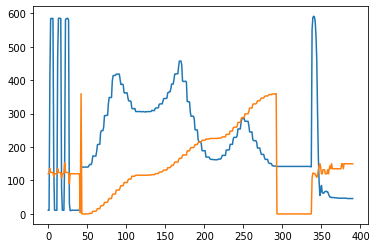

In [66]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(c)
#plt.plot(r)
#plt.plot(g)
#plt.plot(b)
h = [ hue(cr, cg, cb)  for cr, cg, cb in zip(r, g, b) ]
plt.plot(h)

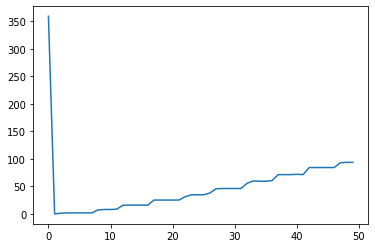

In [64]:
plt.plot(h[50:100])

In [59]:
def hue(r, g, b):
    try:
        if r >= max(g, b):
            hue = (g-b)/(r-min(g, b))
        elif (g >= max(r, b)):
            hue = 2 + (b-r)/(g-min(b, r))
        elif (b >= max(r, g)):
            hue = 4 + (r-g)/(b-min(r, g))
        else:
            hue = 0
    except ZeroDivisionError:
        hue = 0
    hue *= 60
    if hue < 0:
        hue += 360
    return hue

def hsv_to_rgb(h, s, v):
    if s == 0.0: 
        return (v, v, v)
    i = int(h*6) # XXX assume int() truncates!
    f = (h*6)-i
    p,q,t = v*(1-s), v*(1-s*f), v*(1-s*(1-f))
    i %= 6
    
    if i == 0: return (v, t, p)
    if i == 1: return (q, v, p)
    if i == 2: return (p, v, t)
    if i == 3: return (p, q, v)
    if i == 4: return (t, p, v)
    if i == 5: return (v, p, q)

In [50]:
for i in range(0, 360, 50):
    r, g, b = hsv_to_rgb(i/360, 0.5, 0.5)
    print(i, hue(r, g, b))


0 0.0
50 50.00000000000001
100 100.0
150 150.0
200 200.0
250 249.99999999999997
300 0
350 350.0


In [45]:
def hsv_to_rgb(h, s, v):
    if s == 0.0: 
        return (v, v, v)
    i = int(h*6) # XXX assume int() truncates!
    f = (h*6)-i
    p,q,t = v*(1-s), v*(1-s*f), v*(1-s*(1-f))
    i %= 6
    
    if i == 0: return (v, t, p)
    if i == 1: return (q, v, p)
    if i == 2: return (p, v, t)
    if i == 3: return (p, q, v)
    if i == 4: return (t, p, v)
    if i == 5: return (v, p, q)

for h in range(0, 360, 45):
    print("%02X%02X%02X" % tuple(int(x*255)  for x in hsv_to_rgb(h/360, 1, 1)))
    

FF0000
FFBF00
7FFF00
00FF3F
00FFFF
003FFF
7F00FF
FF00BF


In [ ]:
# In pursuit of issue
# https://github.com/micropython/micropython/issues/4212#issuecomment-601505389

In [2]:
0xFFFFFFFF/(0x42460000 - 0x41460000)
256*13

255.99999994039536

In [140]:
import struct
hex(struct.unpack("I", struct.pack("f", 12.375))[0])

'0x41460000'

In [6]:
struct.unpack("f", struct.pack("I", 0x41C80000))

(25.0,)

In [81]:
import math
def conv(x):
    sign = (x&0x80000000)
    e = ((x&0x7f800000)>>23)
    if e == 255:
        return math.nan
    if e == 0:
        exp = -126
        mantissa = (x&0x007FFFFF)
    else:
        exp = e - 127
        mantissa = (x&0x007FFFFF)|0x00800000
    r = mantissa*2**(exp-23)
    if sign:
        r = -r
    return r

x = 0xc1C80000
conv(x)

-25.0

In [119]:
import random
n = 10000
sample =[ random.randint(0,0xFFFFFFFF)  for i in range(n) ]
for j, i in enumerate(sample):
    f = struct.unpack("f", struct.pack("I", i))[0]
    g = conv(i)
    assert f == g or (math.isnan(f) and math.isnan(g)), (f,g,j)

In [120]:
f, g

(2238002944.0, 2238002944)

In [59]:
x = 0x41460000
e = ((x&0x7f800000)>>23)
exp = e - 126
mantissa = (x&0x007FFFFF)|0x00800000
print(hex(mantissa))
# mantissa must have top byte free
assert mantissa & 0xFF000000 == 0

# fractional part
if exp > 0:
    fmant = (mantissa << exp) & 0x00FFFFFF
else:
    fmant = mantissa
print(fmant)
fser = [ ]
while fmant != 0:
    fmant *= 10
    #if exp < 0:
    #    while fmant & 1
    fser.append(chr(ord('0')+(fmant>>24)))
    fmant &= 0x00FFFFFF
fser
    
    

#imant = mantissa>>(24-exp)
#fmant = (mantissa<<(8+exp))&0xFFFFFFFF
#fmant



0xc60000
6291456


['3', '7', '5']

In [58]:
hex(6291456)

'0x600000'

In [64]:
def decdig(d):
    assert 0 <= d <= 9
    return chr(ord('0')+d)

def fracseries(fmant24, exp):
    fser = [ "0", "." ]
    while fmant24 != 0:
        fmant24 *= 10
        #if exp < 0:
        #    while fmant24 & 1
        fser.append(decdig(fmant24>>24))
        fmant24 &= 0x00FFFFFF
    return "".join(fser)

fracseries(0x00600001, 0)


'0.375000059604644775390625'

In [69]:
0.375000059604644775390625

0.3750000596046448

In [78]:
import struct
hex(struct.unpack("I", struct.pack("f", 0.37500005))[0])

'0x3ec00002'

In [146]:
sum((0.5)**(y+1)  for y in range(32)  if fmant&(0x80000000>>y))


0.375

In [51]:
s = fmant>>4
for i in range(4):
    s *= 10
    print(s>>28)
    s &= 0x0FFFFFFF


3
7
5
0


In [160]:
fval = 145.1123
fval

145.1123

In [ ]:
# Work out a C-code jupyter notebook!!!

In [172]:
#####  Work out printing scientific printing formatfloat.c code first
fval = 145.1123
fvalexp10 = 0
while fval >= 10.0:
    fval *= 0.1
    fvalexp10 += 1
while fval <= 1.0:
    fval = 10.0
    fvalexp10 -= 1
#hex(struct.unpack("I", struct.pack("f", 0.37500005))[0])
fval, fvalexp10

ifval = struct.unpack("I", struct.pack("f", fval))[0]
e = ((ifval&0x7f800000)>>23)
exp = e - 126
assert exp > 0
mantissa = (ifval&0x007FFFFF)|0x00800000
imant = ((mantissa << exp) & 0xFF000000) >> 24
fmant = (mantissa << exp) & 0x00FFFFFF

fser = [ chr(ord('0')+imant), "."]
for i in range(7):
    fmant *= 10
    fser.append(chr(ord('0')+(fmant>>24)))
    fmant &= 0x00FFFFFF
fser.append("e")
fser.append("%d"%(fvalexp10))
s = "".join(fser)
s, float(s)



('1.4511229e2', 145.11229)

In [164]:
"%e" % -0.01235

'-1.235000e-02'

In [8]:
import numpy
numpy.arange(0, 10, 1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
nbits = 12
binseries = [ 0.5**(y+1)  for y in range(nbits) ]
bitseries = [ 1<<(nbits-y-1)  for y in range(nbits)]
#bitseries = [ 1<<(y)  for y in range(nbits)]
fracs = numpy.zeros(2**nbits)
for i in range(len(fracs)):
    fracs[i] = sum(binseries[y]  for y in range(nbits)  if i & bitseries[y])
len(fracs)


4096

In [47]:
d0 = ((fracs*10).astype(int))
d1 = numpy.mod((fracs*100).astype(int), 10)
d2 = numpy.mod((fracs*1000).astype(int), 10)
d1


array([0, 0, 0, ..., 9, 9, 9])

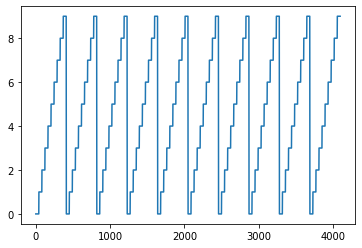

In [48]:
from matplotlib import pyplot
plt.plot(d1)

In [38]:
s0 = d0[1:] - d0[:-1]
t0 = [ i+1  for i in range(len(s0))  if s0[i] ]
t0 = numpy.array([0]+t0)
t0[1:] - t0[:-1]


array([410, 410, 409, 410, 409, 410, 410, 409, 410])

In [39]:
s1 = d1[1:] - d1[:-1]
t1 = [ i+1  for i in range(len(s1))  if s1[i] ]
t1 = numpy.array([0]+t1)
t1[1:] - t1[:-1]

array([41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 40, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41])